In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from mofgraph2vec.data.datamodule import DataModuleFactory
from omegaconf import OmegaConf
import matplotlib.pyplot as plt
import torch
import numpy as np
import pickle

/home/xiazhang/anaconda3/envs/mof2vec/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
config = OmegaConf.load("../conf/config.yaml")
config.doc2label_data = OmegaConf.load("../conf/doc2label_data/rsm.yaml")
config.doc2label_model = OmegaConf.load("../conf/doc2label_model/ensemble.yaml")

In [4]:
config.doc2label_data.label_path = "../data/data.csv"
config.doc2label_data.embedding_path = "/scratch/xiazhang/mofgraph2vec/experiments/workflow/wandb/run-20230214_040352-7k3fr8qv/tmp/embedding.csv"

In [5]:
dmf = DataModuleFactory(**config.doc2label_data)

2023-02-14 09:08:53.115 | INFO     | mofgraph2vec.data.datamodule:__init__:64 - Train: 2637 Valid: 294 Test: 326


In [6]:
train_ds = dmf.get_train_dataset()
valid_ds = dmf.get_valid_dataset()
test_ds = dmf.get_test_dataset()

In [7]:
model = pickle.load(open("/scratch/xiazhang/mofgraph2vec/experiments/workflow/wandb/run-20230214_040352-7k3fr8qv/files/../tmp/best_model.pkl", 'rb'))

In [14]:
pred = model.get_prediction(train_ds.vectors, transform=dmf.transform, target_transform=dmf.target_transform)

In [13]:
trues = train_ds.labels

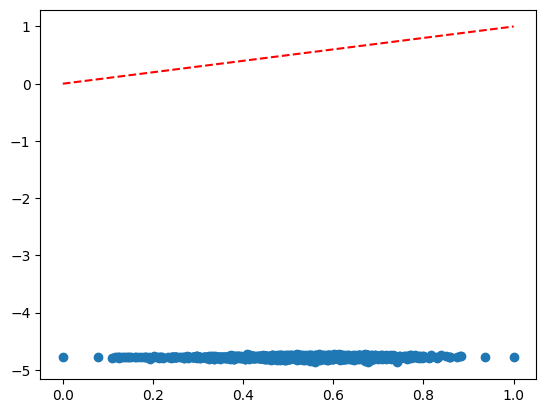

In [15]:
plt.scatter(trues, pred)
plt.plot([0,1.0], [0,1.0], "r--")

In [17]:
model.test(train_ds.vectors, train_ds.labels, dmf.transform, dmf.target_transform)

{'test_mse': 28.339534667764365,
 'test_mae': 5.322275696646677,
 'test_r2': -136470.9404755959}